In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("imdb_labelled.txt"
            )
rev_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
rev_raw.columns = ['Review', 'Sentiment']


rev_raw.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [11]:
#keywords = ['awful', 'disappointing', 'terrible', 'sucked', "don't", 'dislike']

keywords = ['great', 'good', 'love', 'cool', 'incredible', 'best', 'liked', 'delivering', 'worth']

for key in keywords:
    #Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    rev_raw[str(key)] = rev_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

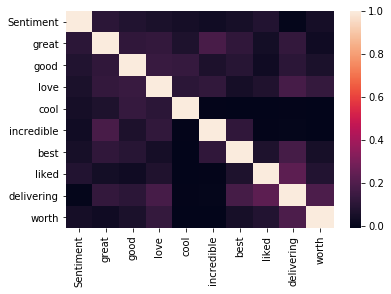

In [12]:
sns.heatmap(rev_raw.corr())

In [13]:
data = rev_raw[keywords]
target = rev_raw['Sentiment']

In [14]:
# Our data is binary/ boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

#Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 328
